In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils

# 1-  Introduction

## 1.1 - Transformations

In [2]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]
    
    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


## 1.2 - Linear Transformations

In [3]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print("T(k*v):\n", T(k*v), "\n k*T(v):\n", k*T(v), "\n\n")
print("T(u+v):\n", T(u+v), "\n\n T(u)+T(v):\n", T(u)+T(v))

T(k*v):
 [[ 42.]
 [  0.]
 [-56.]] 
 k*T(v):
 [[ 42.]
 [  0.]
 [-56.]] 


T(u+v):
 [[ 9.]
 [ 0.]
 [-4.]] 

 T(u)+T(v):
 [[ 9.]
 [ 0.]
 [-4.]]


## 1.3 - Transformations Defined as a Matrix Multiplication

In [4]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print("Transformation matrix:\n", A, "\n")
    w = A @ v
    
    return w

v = np.array([[3], [5]])
w = L(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


# 2 - Standard Transformations in a Plane

In [5]:
img = np.loadtxt('data/image.txt')
print('Shape: ',img.shape)
print(img)

Shape:  (2, 329076)
[[ 399.20891527  400.20891527  404.20891527 ...  -88.79108473
   -88.79108473  -88.79108473]
 [ 534.18310664  534.18310664  534.18310664 ... -476.81689336
  -477.81689336 -478.81689336]]


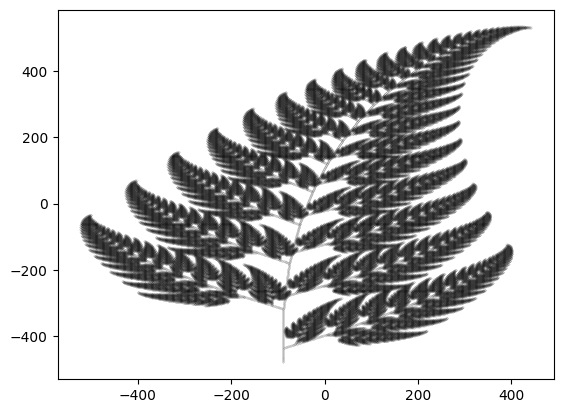

In [6]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black')

### 2.1 - Horizontal Scaling (Dilation)

In [7]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v
    
    return w
    
    
def transform_vectors(T, v1, v2):
    V = np.hstack((v1, v2))
    W = T(V)
    
    return W
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


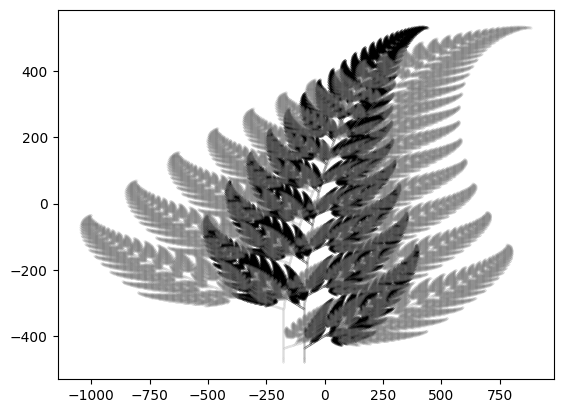

In [9]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_hscaling(img)[0], T_hscaling(img)[1], s = 0.001, color = 'grey')

### 2.2 Stretching by a scalar

In [10]:
def T_stretch(a, v):
    T = np.array([[a,0], [0,a]])
    
    # Compute the transformation
    w = T @ v
    return w

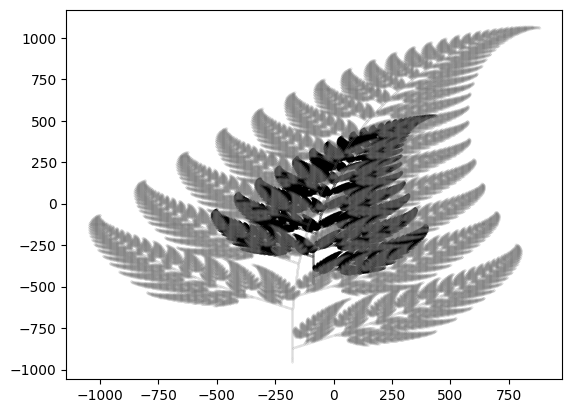

In [11]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_stretch(2,img)[0], T_stretch(2,img)[1], s = 0.001, color = 'grey')

### 2.3 Horizontal shear transformation

In [13]:
def T_hshear(m, v):

    # Define the transformation matrix
    T = np.array([[1,m], [0,1]])
    
    # Compute the transformation
    w = T @ v
    return w

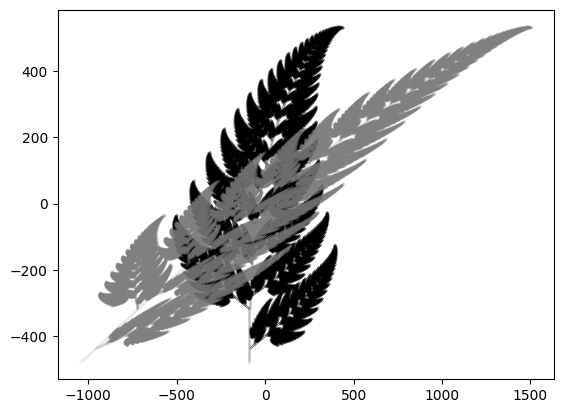

In [14]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_hshear(2,img)[0], T_hshear(2,img)[1], s = 0.001, color = 'grey')

### 2.4 Rotation

In [15]:
def T_rotation(theta, v):

    # Define the transformation matrix
    T = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
    
    # Compute the transformation
    w = T @ v
    return w

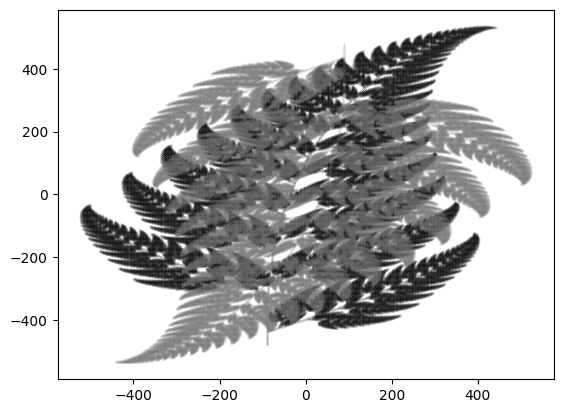

In [16]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_rotation(np.pi,img)[0], T_rotation(np.pi,img)[1], s = 0.001, color = 'grey')

In [17]:
def T_rotation_and_stretch(theta, a, v):

    rotation_T = np.array([[np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]])
    stretch_T = np.array([[a,0], [0,a]])

    w = rotation_T @ (stretch_T @ v)
    return w

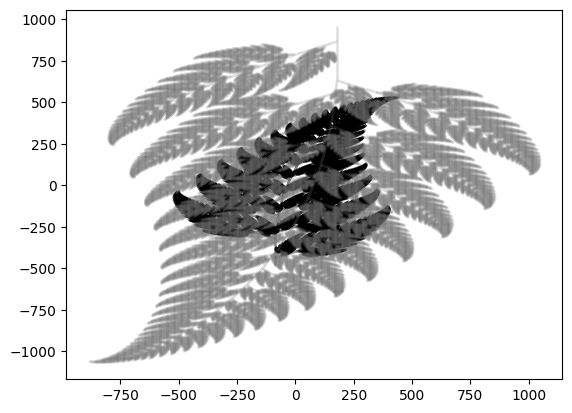

In [18]:
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_rotation_and_stretch(np.pi,2,img)[0], T_rotation_and_stretch(np.pi,2,img)[1], s = 0.001, color = 'grey')